### This is a Doc2Vec model which is trained on tripadvisor data for hotel reviews.
#### I had build a project for my NLP course and trained my model using Doc2vec 
#### Leveraging that model and using the concept of transfer learning.

In [17]:
from gensim.models import doc2vec
import numpy as np
import re
from scipy.spatial.distance import cosine
from wordcloud import  WordCloud
%matplotlib inline

In [4]:
#Loading the pretrained model
model_doc2vec = doc2vec.Doc2Vec.load('../data/tripadvisorReview.model')

In [5]:
#Finding the similar words where positive word shows positive corelation while negative is negative corelation.
model_doc2vec.most_similar(positive=["dirty", "bathroom"], negative=["clean"])

[('toilet', 0.7520424723625183),
 ('carpet', 0.734296441078186),
 ('wallpaper', 0.718379020690918),
 ('tile', 0.7146379947662354),
 ('shower', 0.7054307460784912),
 ('broken', 0.6859976053237915),
 ('mirror', 0.6724027395248413),
 ('wet', 0.6672626733779907),
 ('furniture', 0.6667236685752869),
 ('ac', 0.6655346155166626)]

In [6]:
#Gives top 5 words similar to "hotel"
model_doc2vec.most_similar("hotel",topn=5)

[('property', 0.8964513540267944),
 ('resort', 0.7698929309844971),
 ('facility', 0.7570236921310425),
 ('place', 0.7547503709793091),
 ('establishment', 0.7129979133605957)]

In [7]:
#Gives top 5 words similar to "price"
model_doc2vec.most_similar("price",topn=10)

[('rate', 0.7459497451782227),
 ('inconvenience', 0.7155354022979736),
 ('money', 0.6699727773666382),
 ('purpose', 0.6659839153289795),
 ('option', 0.6521416902542114),
 ('deal', 0.6487311124801636),
 ('event', 0.6283737421035767),
 ('value', 0.6163155436515808),
 ('location', 0.6011558771133423),
 ('reason', 0.5997016429901123)]

In [20]:
# Take input as a line and returns list of words
def split_sentence(sentence):
    words = re.split('\W+', sentence.lower())
    return [word for word in words if word != ""]

# Get the specific line of the review text file
def get_line(filename, n):
    with open(filename) as f:
        for i, e in enumerate(f):
            if i == n:
                return e
            


# Get the index of top n most similar review
def max_index(l, n):
    l_copy = list(l)
    args = []
    for i in range(n):
        arg = np.argmax(l_copy)
        args.append(arg)
        l_copy[arg] = -float('inf')
    return args


In [21]:
# Converting input text to vector from the trained model

input_text = "nice location and clean room"
input_vec = model_doc2vec.infer_vector(split_sentence(input_text))

In [22]:
# Compute the cosine similarity values between the input text and reviews
cosinesimilarity_with_input = map(lambda v: cosine(input_vec, v), model_doc2vec.docvecs)

In [ ]:
# Hotel Reviews with highest cosine similarity 
# This doesnt gives very good results and can be improved further
sim_ids = max_index(cosinesimilarity_with_input, 3)
for i in range(3):
    print "(Review-%s, Similarity:%.4f):" % (sim_ids[i] + 1, cosinesimilarity_with_input[sim_ids[i]]),\
          get_line('../data/tripadvisorReview.txt', sim_ids[i])

### Generating the wordcloud which display the significant words in corpus

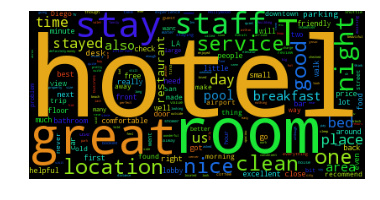

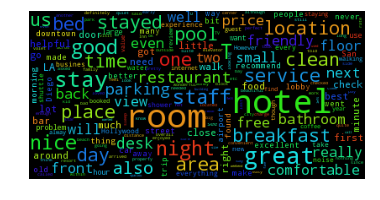

In [18]:
text = open('../data/tripadvisorReview.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [27]:
model_doc2vec.syn0.shape

(12689, 200)

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [43]:
#TSNE visualisation to display the word clusters for 1000 rows
ts = TSNE(2)
reduced_vecs = ts.fit_transform(model_doc2vec.syn0[:1000])

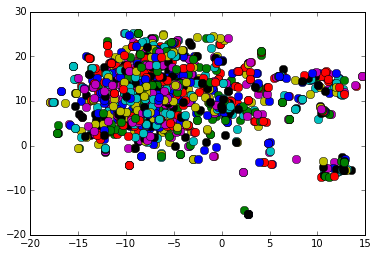

In [44]:
for i in range(len(reduced_vecs)):
    
    plt.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='o',  markersize=8)

In [ ]:
#Get training set vectors from our models
def getVecs(model, corpus, size):
    vecs = [np.array(model[z.labels[0]]).reshape((1, size)) for z in corpus]
    return np.concatenate(vecs)

In [ ]:
# Getting the training and test data

x_train,y_train,x_test,y_test 

In [ ]:
train_vecs_dm = getVecs(model_doc2vec, x_train, size)
test_vecs_dm = getVecs(model_doc2vec, x_test, size)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

print 'Test Accuracy: %.2f'%lr.score(test_vecs, y_test)


In [ ]:
# Metrics for the evaluation of model
# Create ROC curve
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import matplotlib.pyplot as plt

pred_probas = lr.predict_proba(test_vecs)[:,1]

fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

#### Once we have the traning vectors and label then we can also use neural net model or RNN for the classification. It will be having output layer as softmax function which can give the probability distribution for the multiclass classification.

In [ ]:
from NNet import NeuralNet

nnet = NeuralNet(50, learn_rate=1e-2)
maxiter = 500
batch = 150
nnet.fit(train_vecs, y_train, fine_tune=False, maxiter=maxiter, SGD=True, batch=batch, rho=0.9)

print 'Test Accuracy: %.2f'%nnet.score(test_vecs, y_test)

In [ ]:
#Keras or Tensorflow or Graphlab can be used to create the neural net model 

In [ ]:
#Pseudo code from keras 
#Multilayer Perceptron (MLP) for multi-class softmax classification:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, input_dim=20, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          nb_epoch=20,
          batch_size=16)
score = model.evaluate(X_test, y_test, batch_size=16)

In [ ]:
http://cs.stanford.edu/~quocle/paragraph_vector.pdf
http://multithreaded.stitchfix.com/blog/2015/03/11/word-is-worth-a-thousand-vectors/